# 数据准备

## 导入使用库

In [1]:
import urllib.request as ur  # 使用url库
import json        # 使用json库解析json字符串

## 连接高德地图的URL链接
    -> url链接中使用各地区地铁图，只需要更改城市ID以及城市名拼音
    -> 各城市id如下
    北京 1100 天津 1200 石家庄 1301 沈阳 2101 大连 2102 
    长春 2201 哈尔滨 2301上海 3100 南京 3201 无锡 3202 
    苏州 3205 杭州 3301 宁波 3302 合肥 3401 福州 3501 
    南昌 3601 青岛 3702 郑州 4101 武汉 4201 长沙 4301 
    广州 4401 深圳 4403 佛山 4406 东莞 4419 南宁 4501 
    重庆 5000 成都 5101 昆明 5301 西安 6101 香港 8100

In [2]:
url_beijing = "http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json"
url_shenzhen = "http://map.amap.com/service/subway?_1469083453978&srhdata=4403_drw_shenzhen.json"

In [3]:
def get_subway_url(url):
    subway_html = ur.urlopen(url)
    return json.loads(subway_html.read())

In [4]:
print(url_beijing)

http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json


## 提取地铁线路的各项信息

### json文件中的部分数据展示
    {"s":"北京市地铁","i":"1100","l":[{"st":[{"rs":"270 684|270 684","udpx":"270 687;270 681","su":"1","udsu":"1;1","n":"金安桥","sid":"110100023339035","p":"270 684","r":"900000069871|110100023339","udsi":"900000069872015;900000069871002","t":"1","si":"110100023339035","sl":"116.163167,39.923620","udli":"900000069872;900000069871","poiid":"BV10813545","lg":"0","sp":"jin an qiao"},{"rs":"226 684","udpx":"226 681;226 687","su":"1","udsu":"1;1","n":"四道桥","sid":"900000069871003","p":"226 684","r":"900000069871","udsi":"900000069871003;900000069872014","t":"0","si":"900000069871003","sl":"116.134010,39.916030","udli":"900000069871;900000069872","poiid":"BV10813547","lg":"0","sp":"si dao qiao"},{"rs":"181 684","udpx":"180 681;180 687","su":"1","udsu":"1;1","n":"桥户营","sid":"900000069871004","p":"181 684","r":"900000069871","udsi":"900000069871004;900000069872013","t":"0","si":"900000069871004","sl":"116.125809,39.912383","udli":"900000069871;900000069872","poiid":"BV10813541","lg":"0","sp":"qiao hu ying"},{"rs":"155 711","udpx":"152 711;158 711","su":"1","udsu":"1;1","n":"上岸","sid":"900000069871005","p":"155 711","r":"900000069871","udsi":"900000069871005;900000069872012","t":"0","si":"900000069871005","sl":"116.122225,39.905138","udli":"900000069871;900000069872","poiid":"BV10813543","lg":"2","sp":"shang an"},{"rs":"155 735","udpx":"158 735;153 735","su":"1","udsu":"1;1","n":"栗园庄","sid":"900000069871006","p":"155 735","r":"900000069871","udsi":"900000069872011;900000069871006","t":"0","si":"900000069871006","sl":"116.123254,39.895780","udli":"900000069872;900000069871","poiid":"BV10813544","lg":"2","sp":"li yuan zhuang"},{"rs":"131 758","udpx":"131 760;131 755","su":"1","udsu":"1;1","n":"小园","sid":"900000069871007","p":"131 758","r":"900000069871","udsi":"900000069872010;900000069871007","t":"0","si":"900000069871007","sl":"116.114443,39.890465","udli":"900000069872;900000069871","poiid":"BV10813542","lg":"4","sp":"xiao yuan"},

In [5]:
def get_subway_data_of_json(url):
    of_json = get_subway_url(url)
    sw_d = of_json['l']
    sw_dict = dict()
    sw_location = dict()
    for line in sw_d :
        line_name = line['kn']  
        station_list = []
        station_info = line['st']
        for st in station_info:
            station_name = st['n']
            station_list.append(station_name)
            station_dis,st_lat = st['sl'].split(',')
            sw_location[station_name] = (float(station_dis),float(st_lat))  #写入的是地铁站的经纬度信息
        sw_dict[line_name] = station_list  #写入的是地铁线路信息
    return sw_dict,sw_location
        

### 查看北京的地铁线路信息

In [6]:
get_subway_data_of_json(url_beijing)

({'S1线': ['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂'],
  '北京大兴国际机场线': ['草桥', '大兴新城', '大兴机场'],
  '地铁10号线': ['巴沟',
   '苏州街',
   '海淀黄庄',
   '知春里',
   '知春路',
   '西土城',
   '牡丹园',
   '健德门',
   '北土城',
   '安贞门',
   '惠新西街南口',
   '芍药居',
   '太阳宫',
   '三元桥',
   '亮马桥',
   '农业展览馆',
   '团结湖',
   '呼家楼',
   '金台夕照',
   '国贸',
   '双井',
   '劲松',
   '潘家园',
   '十里河',
   '分钟寺',
   '成寿寺',
   '宋家庄',
   '石榴庄',
   '大红门',
   '角门东',
   '角门西',
   '草桥',
   '纪家庙',
   '首经贸',
   '丰台站',
   '泥洼',
   '西局',
   '六里桥',
   '莲花桥',
   '公主坟',
   '西钓鱼台',
   '慈寿寺',
   '车道沟',
   '长春桥',
   '火器营'],
  '地铁13号线': ['西直门',
   '大钟寺',
   '知春路',
   '五道口',
   '上地',
   '西二旗',
   '龙泽',
   '回龙观',
   '霍营',
   '立水桥',
   '北苑',
   '望京西',
   '芍药居',
   '光熙门',
   '柳芳',
   '东直门'],
  '地铁14号线东段': ['善各庄',
   '来广营',
   '东湖渠',
   '望京',
   '阜通',
   '望京南',
   '将台',
   '东风北桥',
   '枣营',
   '朝阳公园',
   '金台路',
   '大望路',
   '九龙山',
   '平乐园',
   '北工大西门',
   '十里河',
   '方庄',
   '蒲黄榆',
   '景泰',
   '永定门外',
   '北京南站'],
  '地铁14号线西段': ['西局', '七里庄', '大井', '郭庄子', '大瓦窑', '园博园'

### 查看深圳的地铁线路信息

In [7]:
get_subway_data_of_json(url_shenzhen)

({'地铁11号线': ['碧头',
   '松岗',
   '后亭',
   '沙井',
   '马安山',
   '塘尾',
   '桥头',
   '福永',
   '机场北',
   '机场',
   '碧海湾',
   '宝安',
   '前海湾',
   '南山',
   '后海',
   '红树湾南',
   '车公庙',
   '福田'],
  '地铁1号线(罗宝线)': ['罗湖',
   '国贸',
   '老街',
   '大剧院',
   '大剧院',
   '科学馆',
   '华强路',
   '岗厦',
   '会展中心',
   '购物公园',
   '香蜜湖',
   '车公庙',
   '竹子林',
   '侨城东',
   '华侨城',
   '世界之窗',
   '白石洲',
   '高新园',
   '深大',
   '桃园',
   '大新',
   '鲤鱼门',
   '前海湾',
   '新安',
   '宝安中心',
   '宝体',
   '坪洲',
   '西乡',
   '固戍',
   '后瑞',
   '机场东'],
  '地铁2号线(蛇口线)': ['赤湾',
   '蛇口港',
   '海上世界',
   '水湾',
   '东角头',
   '湾厦',
   '海月',
   '登良',
   '后海',
   '科苑',
   '红树湾',
   '世界之窗',
   '侨城北',
   '深康',
   '安托山',
   '侨香',
   '香蜜',
   '香梅北',
   '景田',
   '莲花西',
   '福田',
   '市民中心',
   '岗厦北',
   '华强北',
   '燕南',
   '大剧院',
   '湖贝',
   '黄贝岭',
   '新秀'],
  '地铁3号线(龙岗线)': ['益田',
   '石厦',
   '购物公园',
   '福田',
   '少年宫',
   '莲花村',
   '华新',
   '通新岭',
   '红岭',
   '老街',
   '晒布',
   '翠竹',
   '田贝',
   '水贝',
   '草埔',
   '布吉',
   '木棉湾',
   '大芬',
   '丹竹头',
   '六约',
   '塘坑',
 

### 使用深圳地铁数据展开分析

In [8]:
station_info,station_location = get_subway_data_of_json(url_shenzhen)

In [9]:
station_info.keys()

dict_keys(['地铁1号线(罗宝线)', '地铁2号线(蛇口线)', '地铁3号线(龙岗线)', '地铁4号线(龙华线)', '地铁5号线(环中线)', '地铁7号线', '地铁9号线', '地铁11号线'])

In [10]:
station_info['地铁1号线(罗宝线)']

['罗湖',
 '国贸',
 '老街',
 '大剧院',
 '大剧院',
 '科学馆',
 '华强路',
 '岗厦',
 '会展中心',
 '购物公园',
 '香蜜湖',
 '车公庙',
 '竹子林',
 '侨城东',
 '华侨城',
 '世界之窗',
 '白石洲',
 '高新园',
 '深大',
 '桃园',
 '大新',
 '鲤鱼门',
 '前海湾',
 '新安',
 '宝安中心',
 '宝体',
 '坪洲',
 '西乡',
 '固戍',
 '后瑞',
 '机场东']

### 绘制地图

In [11]:
# 导入绘制地图的库
import networkx as nx
import matplotlib.pyplot as plt
# 解决中文字体显示问题
# %matplotlib inline
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

In [12]:
station_location.keys()

dict_keys(['罗湖', '国贸', '老街', '大剧院', '科学馆', '华强路', '岗厦', '会展中心', '购物公园', '香蜜湖', '车公庙', '竹子林', '侨城东', '华侨城', '世界之窗', '白石洲', '高新园', '深大', '桃园', '大新', '鲤鱼门', '前海湾', '新安', '宝安中心', '宝体', '坪洲', '西乡', '固戍', '后瑞', '机场东', '赤湾', '蛇口港', '海上世界', '水湾', '东角头', '湾厦', '海月', '登良', '后海', '科苑', '红树湾', '侨城北', '深康', '安托山', '侨香', '香蜜', '香梅北', '景田', '莲花西', '福田', '市民中心', '岗厦北', '华强北', '燕南', '湖贝', '黄贝岭', '新秀', '益田', '石厦', '少年宫', '莲花村', '华新', '通新岭', '红岭', '晒布', '翠竹', '田贝', '水贝', '草埔', '布吉', '木棉湾', '大芬', '丹竹头', '六约', '塘坑', '横岗', '永湖', '荷坳', '大运', '爱联', '吉祥', '龙城广场', '南联', '双龙', '福田口岸', '福民', '莲花北', '上梅林', '民乐', '白石龙', '深圳北站', '红山', '上塘', '龙胜', '龙华', '清湖', '荔湾', '铁路公园', '妈湾', '前湾公园', '前湾', '桂湾', '临海', '宝华', '翻身', '灵芝', '洪浪北', '兴东', '留仙洞', '西丽', '大学城', '塘朗', '长岭陂', '民治', '五和', '坂田', '杨美', '上水径', '下水径', '长龙', '百鸽笼', '布心', '太安', '怡景', '西丽湖', '茶光', '珠光', '龙井', '桃源村', '深云', '农林', '上沙', '沙尾', '皇岗村', '皇岗口岸', '赤尾', '华强南', '黄木岗', '八卦岭', '红岭北', '笋岗', '洪湖', '红树湾南', '深湾', '深圳湾公园', '下沙', '香梅', '梅景', '下梅林', '梅村', '孖岭', '银湖', '泥

In [13]:
station_location.values()

dict_values([(114.118666, 22.532083), (114.118909, 22.53968), (114.116939, 22.544232), (114.107811, 22.5418), (114.094946, 22.540618), (114.085133, 22.540459), (114.06819, 22.534854), (114.061101, 22.534769), (114.054581, 22.534655), (114.038637, 22.538887), (114.02583, 22.536247), (114.013917, 22.533357), (113.996651, 22.532406), (113.985369, 22.533489), (113.974216, 22.5369), (113.967048, 22.539604), (113.953842, 22.540236), (113.944173, 22.538667), (113.924857, 22.532357), (113.915072, 22.532232), (113.903079, 22.532005), (113.897932, 22.537121), (113.894625, 22.547468), (113.887233, 22.554575), (113.880641, 22.560741), (113.870711, 22.568908), (113.863048, 22.575149), (113.846792, 22.601363), (113.835449, 22.628835), (113.822634, 22.647001), (113.897525, 22.479227), (113.912331, 22.476626), (113.915111, 22.485101), (113.919686, 22.488389), (113.931149, 22.486325), (113.938604, 22.493353), (113.937715, 22.500409), (113.937602, 22.509146), (113.942498, 22.518422), (113.946195, 22.527

In [14]:
subway_graph = nx.Graph()
subway_graph.add_nodes_from(list(station_location.keys()))

F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or

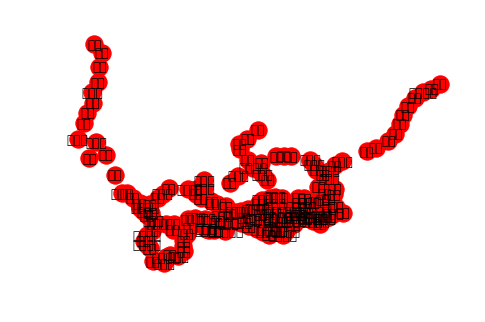

In [15]:
nx.draw(subway_graph, station_location, with_labels=True, node_size=300)

#### 画图失败。。。。。

In [16]:
import math

def geo_distance(origin, destination):

    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [17]:
def get_station_distance(station1,station2):
    return geo_distance(station_location[station1],station_location[station2])

In [18]:
get_station_distance("车公庙","水贝")

11.15644186300603

### 依据各地铁线连接站点 

In [19]:
# 因为深圳地铁没有环线，所以不考虑环线带来的连接问题（如：北京需要考虑环线连接问题）
def get_subway_graph_connection(station):
    line_st = []
    for i,j in station_info.items():
        if station in j:
            station_index = j.index(station)
            if station_index != 0:
                line_st.append(j[station_index-1])
            if station_index != (len(j)-1):
                line_st.append(j[station_index+1])
    return line_st

In [20]:
get_subway_graph_connection('车公庙')

['香蜜湖', '竹子林', '农林', '上沙', '下沙', '香梅', '红树湾南', '福田']

### Use BFS A to B 最少换乘

In [21]:
def bfs_search(start, destination):
    pathes = [[start]]  #建立list pathes 维护搜索路径
    visited = [start]
    
    while pathes:
        path = pathes.pop(0)   #拿出第一条路径
#         检查该路径与那个节点相连
        froniter = path[-1]
        successors = get_subway_graph_connection(froniter)
        for next_station in successors:
            if next_station in visited:continue
            new_path = path + [next_station]
            pathes.append(new_path)    #将新拓展的路径放入list中
#             检查最后的station是否为终结点，如果是就返回路径
            if next_station == destination:
                return new_path
        visited.append(next_station)

In [77]:
def search(start,destination):
    paths = bfs_search(start,destination)
    return "->".join(paths)+'---'+str(str(len(paths))+'站')

In [78]:
search("后海","华强北")

'后海->红树湾南->车公庙->福田->市民中心->岗厦北->华强北---7站'

In [79]:
search("车公庙","水贝")

'车公庙->福田->市民中心->岗厦北->华强北->燕南->大剧院->老街->晒布->翠竹->田贝->水贝---12站'

In [80]:
search("下沙","坂田")

'下沙->车公庙->福田->少年宫->莲花北->上梅林->民乐->白石龙->深圳北站->民治->五和->坂田---12站'

### Use BFS A to B 最短距离

In [31]:
def bfs_search_sort(start, destination):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited:continue
        if froniter == destination:
            return path
        successsors = get_subway_graph_connection(froniter)
        for st in successsors:
            if st in path: continue  
            new_path = path + [st]
            pathes.append(new_path)  
        pathes = sort_by_distance(pathes)
        visited.add(froniter)
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]

In [32]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0 
        for i,_ in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [70]:
def search_sort(start,destination):
    pathes = bfs_search_sort(start,destination)
    return "->".join(pathes)+'---'+str(str(len(pathes))+'站')

In [81]:
search("车公庙","水贝")

'车公庙->福田->市民中心->岗厦北->华强北->燕南->大剧院->老街->晒布->翠竹->田贝->水贝---12站'

In [82]:
search_sort("车公庙","水贝")

'车公庙->福田->少年宫->莲花村->华新->黄木岗->八卦岭->红岭北->笋岗->洪湖->田贝->水贝---12站'

In [83]:
search("赤湾","上塘")

'赤湾->蛇口港->海上世界->水湾->东角头->湾厦->海月->登良->后海->红树湾南->车公庙->福田->少年宫->莲花北->上梅林->民乐->白石龙->深圳北站->红山->上塘---20站'

In [84]:
search_sort("赤湾","上塘")

'赤湾->荔湾->铁路公园->妈湾->前湾公园->前湾->桂湾->前海湾->新安->宝安中心->翻身->灵芝->洪浪北->兴东->留仙洞->西丽->大学城->塘朗->长岭陂->深圳北站->红山->上塘---22站'

In [85]:
search("后海","华强北")

'后海->红树湾南->车公庙->福田->市民中心->岗厦北->华强北---7站'

In [86]:
search_sort("后海","华强北")

'后海->红树湾南->车公庙->福田->市民中心->岗厦北->华强北---7站'